# Data Analysis on Exercise 1

## load data set

the newest version of the dataset  is used [NEW ArtVis dataset delimited with semicolons](https://tuwel.tuwien.ac.at/mod/resource/view.php?id=2457815)

In [48]:
from zipfile import sizeEndCentDir

import polars as pl
from datetime import datetime

artvis_df = pl.read_csv(source='data/artvis_dump_NEW-semicolon.csv',has_header=True, separator=';',null_values=['\\N'])
artvis_df = artvis_df.with_columns(
    pl.col('a.birthdate').replace("01/01/1900","1900-01-01")
)
artvis_df = artvis_df.with_columns(
    pl.col('a.birthdate').str.to_date('%Y-%m-%d',strict=True)
)
artvis_df = artvis_df.with_columns(
    pl.col('a.deathdate').str.to_date('%Y-%m-%d',strict=True)
)
#artvis_df.head(10)

In [49]:
artvis_df

a.id,a.firstname,a.lastname,a.gender,a.birthdate,a.deathdate,a.birthplace,a.deathplace,a.nationality,e.id,e.title,e.venue,e.startdate,e.type,e.paintings,e.country,e.city,e.latitude,e.longitude
i64,str,str,str,date,date,str,str,str,i64,str,str,i64,str,i64,str,str,f64,f64
1,"""William Bernard""","""Adeney""","""M""",1878-01-01,1966-01-01,"""London""","""London""","""GB""",489,"""Second Post-Impressionist Exhi…","""Grafton Galleries""",1912,"""group""",4,"""GB""","""London""",51.514248,-0.093145
1,"""William Bernard""","""Adeney""","""M""",1878-01-01,1966-01-01,"""London""","""London""","""GB""",618,"""Exhibition of the Camden Town …","""Public Art Galleries""",1913,"""group""",6,"""GB""","""Brighton""",50.833333,-0.15
1,"""William Bernard""","""Adeney""","""M""",1878-01-01,1966-01-01,"""London""","""London""","""GB""",720,"""The Second Exhibition of Works…","""Goupil Gallery""",1915,"""group""",4,"""GB""","""London""",51.514248,-0.093145
1,"""William Bernard""","""Adeney""","""M""",1878-01-01,1966-01-01,"""London""","""London""","""GB""",729,"""Third Exhibition of Works by M…","""Goupil Gallery""",1915,"""group""",5,"""GB""","""London""",51.514248,-0.093145
1,"""William Bernard""","""Adeney""","""M""",1878-01-01,1966-01-01,"""London""","""London""","""GB""",650,"""The First Exhibition of Works …","""Goupil Gallery""",1914,"""group""",5,"""GB""","""London""",51.514248,-0.093145
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
13998,"""Adam Emory""","""Albright""","""M""",1862-01-01,1957-01-01,"""Monroe""","""Warrenville""","""US""",224,"""Thirteenth Annual Exhibition""","""Carnegie Institute""",1909,"""group""",1,"""US""","""Pittsburgh""",40.4333,-79.9833
13999,"""Anna""","""Davidson""","""F""",0000-01-01,0000-01-01,null,null,null,666,"""Erste Ausstellung der Freien S…","""Ausstellungshaus am Kurfürsten…",1914,"""group""",1,"""DE""","""Berlin""",52.516667,13.4
13999,"""Anna""","""Davidson""","""F""",0000-01-01,0000-01-01,null,null,null,547,"""Frühjahr-Ausstellung der Münch…","""Königliches Kunstausstellungsg…",1913,"""group""",1,"""DE""","""Munich""",48.15,11.583333


In [50]:
artvis_df.filter(pl.col('a.birthdate').dt.year() == 0)

a.id,a.firstname,a.lastname,a.gender,a.birthdate,a.deathdate,a.birthplace,a.deathplace,a.nationality,e.id,e.title,e.venue,e.startdate,e.type,e.paintings,e.country,e.city,e.latitude,e.longitude
i64,str,str,str,date,date,str,str,str,i64,str,str,i64,str,i64,str,str,f64,f64
112,"""Anna Michajlovna""","""Kirillova""","""F""",0000-01-01,0000-01-01,null,null,"""RU""",602,"""Постоянная Выставка Современна…","""Художественное Бюро Добычиной""",1913,"""group""",1,"""RU""","""Saint Petersburg""",59.8833,30.25
112,"""Anna Michajlovna""","""Kirillova""","""F""",0000-01-01,0000-01-01,null,null,"""RU""",732,"""Последняя футуристическая выст…","""Художественное Бюро Добычиной""",1916,"""group""",4,"""RU""","""Saint Petersburg""",59.8833,30.25
112,"""Anna Michajlovna""","""Kirillova""","""F""",0000-01-01,0000-01-01,null,null,"""RU""",543,"""Внепартийное общество художник…","""Dom Saltykova""",1913,"""group""",17,"""RU""","""Saint Petersburg""",59.8833,30.25
471,"""Fritz""","""Herzog""","""M""",0000-01-01,0000-01-01,null,null,null,3,"""2. Deutsche Künstlerbund Ausst…","""Ausstellungshaus am Kurfürsten…",1905,"""group""",2,"""DE""","""Berlin""",52.516667,13.4
471,"""Fritz""","""Herzog""","""M""",0000-01-01,0000-01-01,null,null,null,3,"""2. Deutsche Künstlerbund Ausst…","""Deutscher Künstlerbund""",1905,"""group""",2,"""DE""","""-""",51.5,10.5
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
13972,"""J. A.""","""Addicks""",null,0000-01-01,0000-01-01,null,null,null,1397,"""Tentoonstelling van Teekeninge…","""Arti et Amicitiae""",1909,"""group""",1,"""NL""","""Amsterdam""",52.35,4.916667
13999,"""Anna""","""Davidson""","""F""",0000-01-01,0000-01-01,null,null,null,666,"""Erste Ausstellung der Freien S…","""Ausstellungshaus am Kurfürsten…",1914,"""group""",1,"""DE""","""Berlin""",52.516667,13.4
13999,"""Anna""","""Davidson""","""F""",0000-01-01,0000-01-01,null,null,null,547,"""Frühjahr-Ausstellung der Münch…","""Königliches Kunstausstellungsg…",1913,"""group""",1,"""DE""","""Munich""",48.15,11.583333


In [51]:
print(pl.DataFrame(zip(artvis_df.columns,artvis_df.dtypes)).to_pandas().to_latex())

\begin{tabular}{lll}
\toprule
 & column_0 & column_1 \\
\midrule
0 & a.id & Int64 \\
1 & a.firstname & String \\
2 & a.lastname & String \\
3 & a.gender & String \\
4 & a.birthdate & Date \\
5 & a.deathdate & Date \\
6 & a.birthplace & String \\
7 & a.deathplace & String \\
8 & a.nationality & String \\
9 & e.id & Int64 \\
10 & e.title & String \\
11 & e.venue & String \\
12 & e.startdate & Int64 \\
13 & e.type & String \\
14 & e.paintings & Int64 \\
15 & e.country & String \\
16 & e.city & String \\
17 & e.latitude & Float64 \\
18 & e.longitude & Float64 \\
\bottomrule
\end{tabular}



In [52]:
artvis_df.filter(pl.col('a.deathdate').dt.year() == 0)

a.id,a.firstname,a.lastname,a.gender,a.birthdate,a.deathdate,a.birthplace,a.deathplace,a.nationality,e.id,e.title,e.venue,e.startdate,e.type,e.paintings,e.country,e.city,e.latitude,e.longitude
i64,str,str,str,date,date,str,str,str,i64,str,str,i64,str,i64,str,str,f64,f64
112,"""Anna Michajlovna""","""Kirillova""","""F""",0000-01-01,0000-01-01,null,null,"""RU""",602,"""Постоянная Выставка Современна…","""Художественное Бюро Добычиной""",1913,"""group""",1,"""RU""","""Saint Petersburg""",59.8833,30.25
112,"""Anna Michajlovna""","""Kirillova""","""F""",0000-01-01,0000-01-01,null,null,"""RU""",732,"""Последняя футуристическая выст…","""Художественное Бюро Добычиной""",1916,"""group""",4,"""RU""","""Saint Petersburg""",59.8833,30.25
112,"""Anna Michajlovna""","""Kirillova""","""F""",0000-01-01,0000-01-01,null,null,"""RU""",543,"""Внепартийное общество художник…","""Dom Saltykova""",1913,"""group""",17,"""RU""","""Saint Petersburg""",59.8833,30.25
471,"""Fritz""","""Herzog""","""M""",0000-01-01,0000-01-01,null,null,null,3,"""2. Deutsche Künstlerbund Ausst…","""Ausstellungshaus am Kurfürsten…",1905,"""group""",2,"""DE""","""Berlin""",52.516667,13.4
471,"""Fritz""","""Herzog""","""M""",0000-01-01,0000-01-01,null,null,null,3,"""2. Deutsche Künstlerbund Ausst…","""Deutscher Künstlerbund""",1905,"""group""",2,"""DE""","""-""",51.5,10.5
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
13972,"""J. A.""","""Addicks""",null,0000-01-01,0000-01-01,null,null,null,1397,"""Tentoonstelling van Teekeninge…","""Arti et Amicitiae""",1909,"""group""",1,"""NL""","""Amsterdam""",52.35,4.916667
13999,"""Anna""","""Davidson""","""F""",0000-01-01,0000-01-01,null,null,null,666,"""Erste Ausstellung der Freien S…","""Ausstellungshaus am Kurfürsten…",1914,"""group""",1,"""DE""","""Berlin""",52.516667,13.4
13999,"""Anna""","""Davidson""","""F""",0000-01-01,0000-01-01,null,null,null,547,"""Frühjahr-Ausstellung der Münch…","""Königliches Kunstausstellungsg…",1913,"""group""",1,"""DE""","""Munich""",48.15,11.583333


extract column names of artists and exhibitions

In [53]:
artist_columns = [e for e in artvis_df.columns if e.startswith('a.')]
exhibition_columns = [e for e in artvis_df.columns if e.startswith('e.')]

create 2 separate dataframes for artists and exhibitions 

In [54]:
artists_df = artvis_df.select(artist_columns).unique()
exhibitions_df = artvis_df.select(exhibition_columns).unique()

descriptive statistic on artists

In [55]:
artists_df.filter(pl.col('a.birthdate').dt.year() == 0)

a.id,a.firstname,a.lastname,a.gender,a.birthdate,a.deathdate,a.birthplace,a.deathplace,a.nationality
i64,str,str,str,date,date,str,str,str
10980,"""V. A.""","""Vebb""","""M""",0000-01-01,0000-01-01,null,null,null
7784,"""C. Moffat""","""Adam""",null,0000-01-01,0000-01-01,null,null,null
5202,null,"""Saint""",null,0000-01-01,0000-01-01,null,null,null
13180,"""Mary""","""Williams""","""F""",0000-01-01,0000-01-01,null,null,null
12616,"""Felice""","""Mazzucchi""","""M""",0000-01-01,0000-01-01,null,null,null
…,…,…,…,…,…,…,…,…
8964,"""P.""","""Fanfani""",null,0000-01-01,0000-01-01,null,null,null
9414,"""J.-A.""","""Mandt""",null,0000-01-01,0000-01-01,null,null,null
12976,"""Mariquita""","""Rigamonti""","""F""",0000-01-01,0000-01-01,null,null,null


In [56]:
artists_df.filter(pl.col('a.deathdate').dt.year() == 0)

a.id,a.firstname,a.lastname,a.gender,a.birthdate,a.deathdate,a.birthplace,a.deathplace,a.nationality
i64,str,str,str,date,date,str,str,str
10980,"""V. A.""","""Vebb""","""M""",0000-01-01,0000-01-01,null,null,null
7784,"""C. Moffat""","""Adam""",null,0000-01-01,0000-01-01,null,null,null
5202,null,"""Saint""",null,0000-01-01,0000-01-01,null,null,null
13180,"""Mary""","""Williams""","""F""",0000-01-01,0000-01-01,null,null,null
12616,"""Felice""","""Mazzucchi""","""M""",0000-01-01,0000-01-01,null,null,null
…,…,…,…,…,…,…,…,…
12976,"""Mariquita""","""Rigamonti""","""F""",0000-01-01,0000-01-01,null,null,null
12525,"""A.""","""De Kat""",null,0000-01-01,0000-01-01,null,null,null
9069,null,"""Di Francesco""",null,0000-01-01,0000-01-01,null,null,null


In [57]:
#artists_df.describe()

In [58]:
artists_df.select('a.id').select(pl.len())

len
u32
13267


In [59]:
exhibitions_df.describe()

statistic,e.id,e.title,e.venue,e.startdate,e.type,e.paintings,e.country,e.city,e.latitude,e.longitude
str,f64,str,str,f64,str,f64,str,str,f64,f64
"""count""",9193.0,"""9193""","""9193""",9193.0,"""9193""",9193.0,"""9187""","""9180""",9180.0,9180.0
"""null_count""",0.0,"""0""","""0""",0.0,"""0""",0.0,"""6""","""13""",13.0,13.0
"""mean""",654.481888,null,null,1910.040792,null,12.951267,null,null,50.23345,11.019508
"""std""",430.524435,null,null,2.814154,null,24.162022,null,null,3.67528,15.814008
"""min""",3.0,"""1-ая Футуристическая Выставка …","""Akademischer Verband für Liter…",1902.0,"""auction""",1.0,"""AT""","""-""",35.75,-122.4167
"""25%""",280.0,null,null,1908.0,null,3.0,null,null,48.2167,4.333333
"""50%""",588.0,null,null,1910.0,null,7.0,null,null,50.1,13.4
"""75%""",1050.0,null,null,1912.0,null,13.0,null,null,52.35,16.3667
"""max""",1487.0,"""Художественная выставка „Мир И…","""Художественный салон 11""",1916.0,"""solo""",760.0,"""US""","""Zurich""",59.9333,139.5


In [60]:
exhibitions_df.select('e.id').select(pl.len())

len
u32
9193


## Artits

plots on artists

### Nationalities

<Axes: xlabel='a.nationality', ylabel='len'>

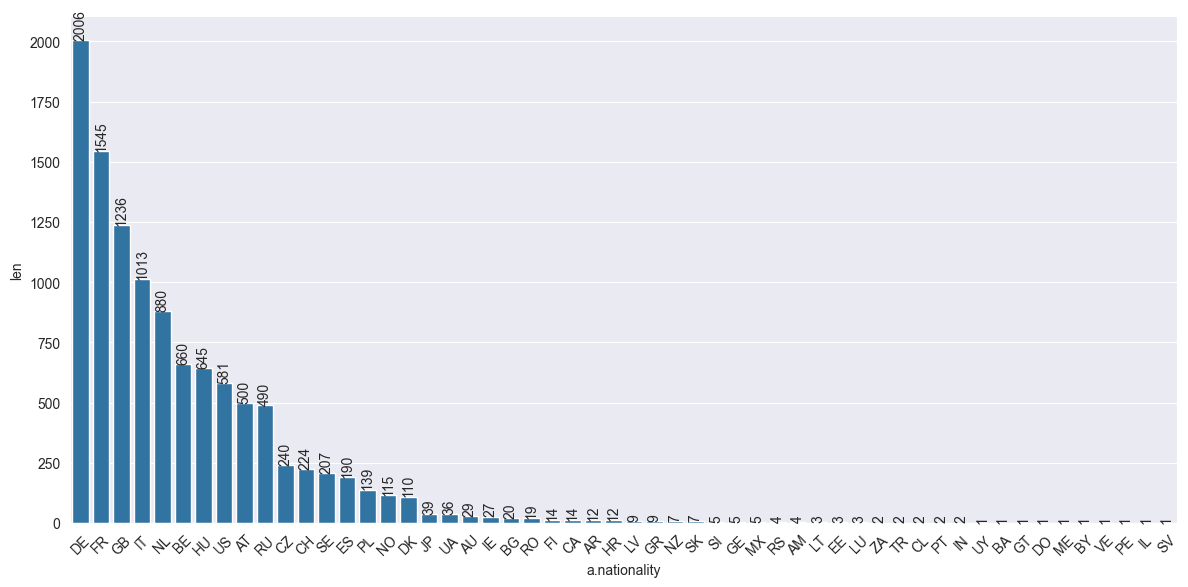

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

artvis_national = artists_df.group_by('a.nationality').len().sort('len', descending=True)
plt.figure(figsize=(12,6))
plot = sns.barplot(data=artvis_national, x='a.nationality', y='len', )
plt.setp(plot.get_xticklabels(), rotation=45)
plot.bar_label(plot.containers[0], rotation=90)
plt.tight_layout()
plot


### Gender

<Axes: xlabel='a.gender', ylabel='percent'>

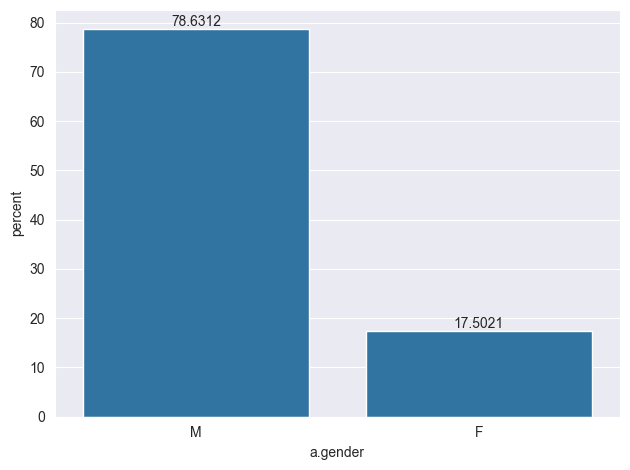

In [62]:
import seaborn as sns
from matplotlib import pyplot as plt

plot = sns.countplot(data=artists_df, x='a.gender', stat='percent')
plot.bar_label(plot.containers[0])
plt.tight_layout()
plt.savefig('data/gender.png')
plot

In [63]:
artvis_df.select('a.id','a.nationality').group_by('a.id','a.nationality').len().group_by('a.nationality').len().sort('len',descending=True)

a.nationality,len
str,u32
null,2180
"""DE""",2006
"""FR""",1545
"""GB""",1236
"""IT""",1013
…,…
"""UY""",1
"""ME""",1
"""PE""",1


## Exhibitions

plots on exhibitions

### Country

<Axes: xlabel='e.country', ylabel='len'>

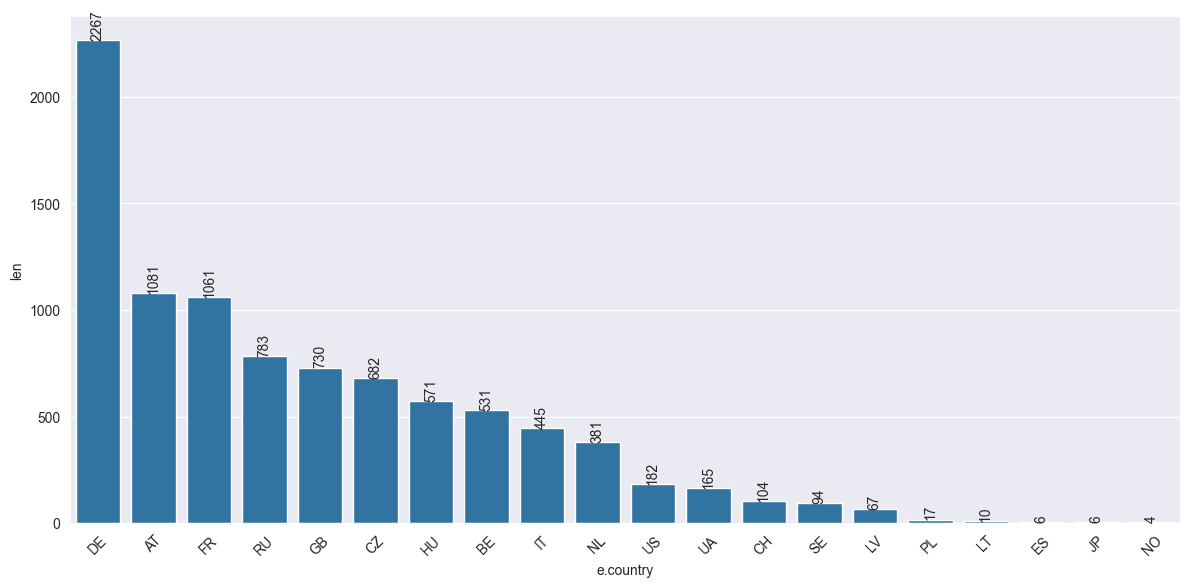

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
plot = sns.barplot(data=exhibitions_df.group_by('e.country').len().sort('len', descending=True), x='e.country', y='len', )
plt.setp(plot.get_xticklabels(), rotation=45)
plot.bar_label(plot.containers[0], rotation=90)
plt.tight_layout()
plt.savefig('data/exhibition_countrys.png')
plot

### Type of Exhibition

<Axes: xlabel='e.type', ylabel='len'>

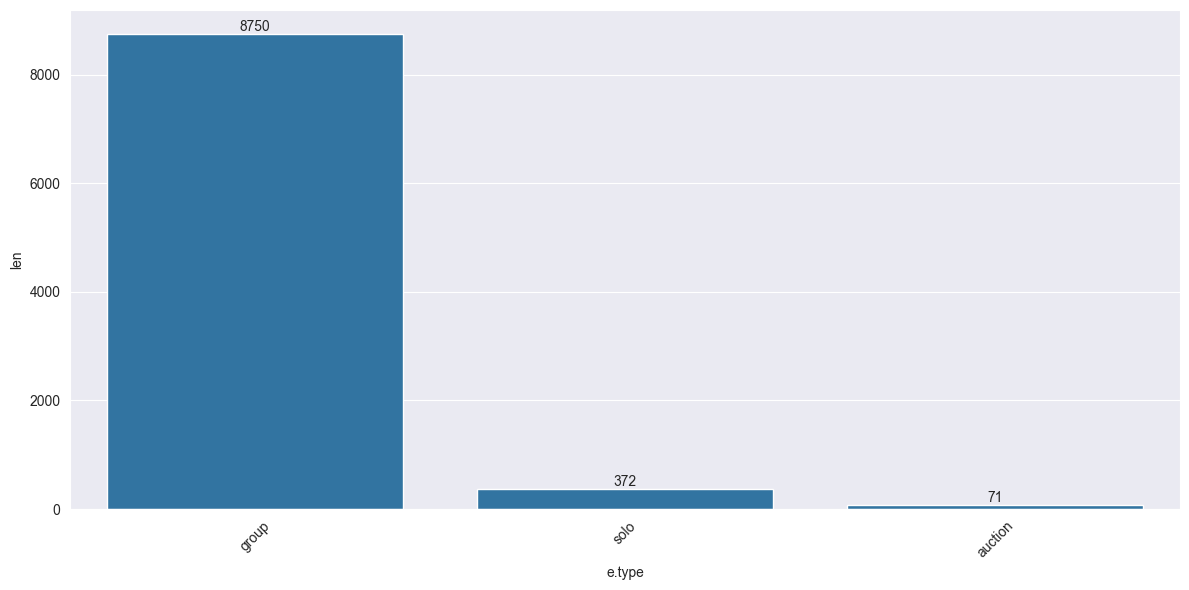

In [65]:
plt.figure(figsize=(12,6))
plot = sns.barplot(data=exhibitions_df.group_by('e.type').len().sort('len', descending=True), x='e.type', y='len', )
plt.setp(plot.get_xticklabels(), rotation=45)
plot.bar_label(plot.containers[0] )
plt.tight_layout()
plt.savefig('data/exhibition_types.png')
plot

### City

<Axes: xlabel='e.city', ylabel='len'>

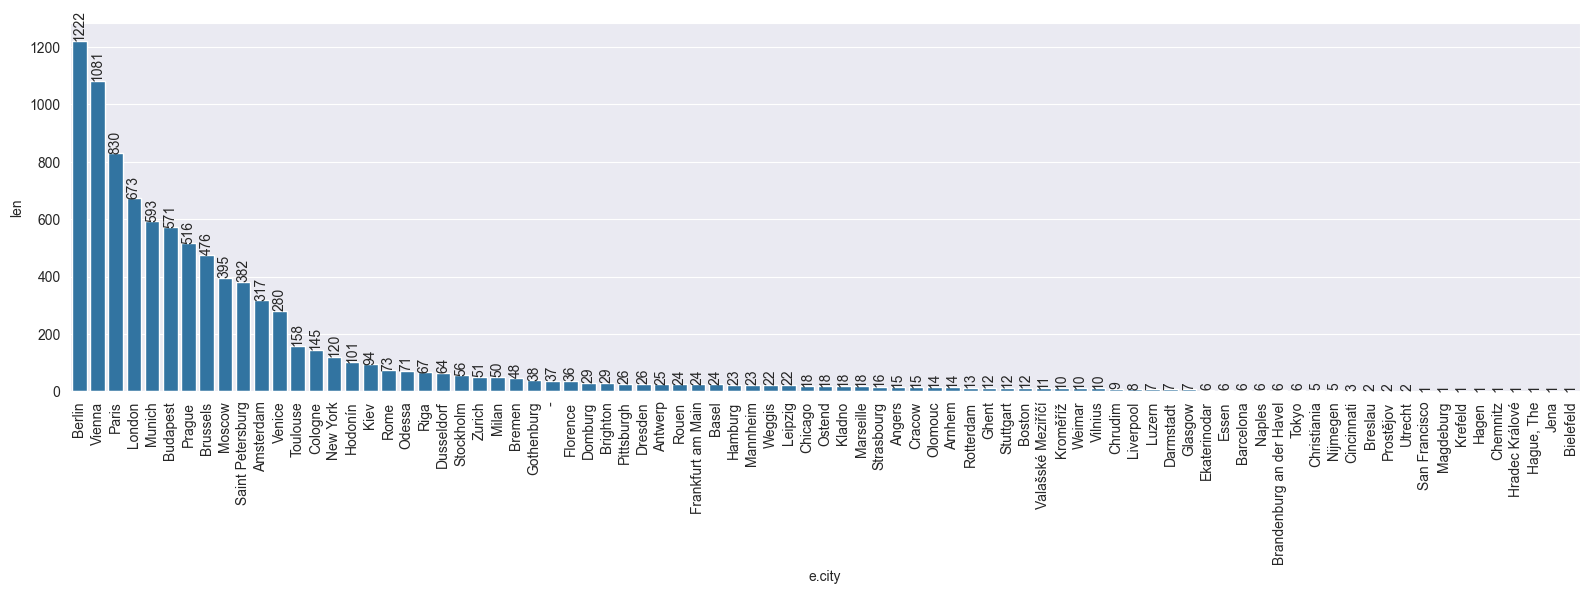

In [66]:
plt.figure(figsize=(16,6))
plot = sns.barplot(data=exhibitions_df.group_by('e.city').len().sort('len', descending=True), x='e.city', y='len')
plt.setp(plot.get_xticklabels(), rotation=90)
plot.bar_label(plot.containers[0], rotation=90 )
plt.tight_layout()
plt.savefig('data/exhibition_cities.png')
plot

### Startdate

<Axes: xlabel='e.startdate', ylabel='len'>

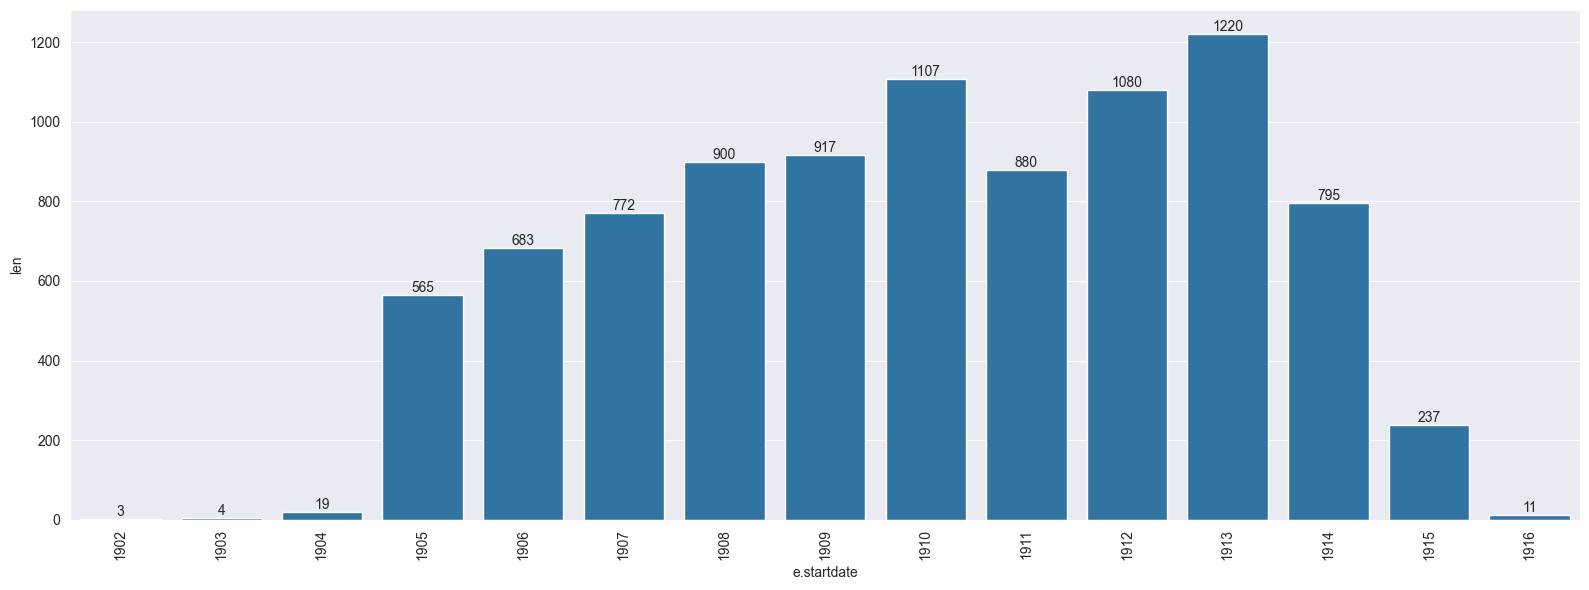

In [67]:
plt.figure(figsize=(16,6))
plot = sns.barplot(data=exhibitions_df.group_by('e.startdate').len().sort('len', descending=True), x='e.startdate', y='len')
plt.setp(plot.get_xticklabels(), rotation=90)
plot.bar_label(plot.containers[0] )
plt.tight_layout()
plt.savefig('data/exhibition_startdates.png')
plot

In [68]:
artvis_df.filter(pl.col('e.type')=='auction')

a.id,a.firstname,a.lastname,a.gender,a.birthdate,a.deathdate,a.birthplace,a.deathplace,a.nationality,e.id,e.title,e.venue,e.startdate,e.type,e.paintings,e.country,e.city,e.latitude,e.longitude
i64,str,str,str,date,date,str,str,str,i64,str,str,i64,str,i64,str,str,f64,f64
5,"""Vassily""","""Kandinsky""","""M""",1866-01-01,1944-01-01,"""Moscow""","""Neuilly-sur-Seine""","""RU""",1095,"""Vente Aux Enchères Publiques D…","""Hôtel Drouot""",1906,"""auction""",1,"""FR""","""Paris""",48.866667,2.333333
30,"""Émile""","""Bernard""","""M""",1868-01-01,1941-01-01,"""Lille""","""Paris""","""FR""",1131,"""Tableaux Modernes. Aquarelles,…","""Hôtel Drouot""",1908,"""auction""",2,"""FR""","""Paris""",48.866667,2.333333
37,"""Pierre""","""Bonnard""","""M""",1867-01-01,1947-01-01,"""Fontenay-aux-Roses""","""Le Cannet""","""FR""",1249,"""Collection de M. Albert Bernie…","""Hôtel Drouot""",1910,"""auction""",1,"""FR""","""Paris""",48.866667,2.333333
37,"""Pierre""","""Bonnard""","""M""",1867-01-01,1947-01-01,"""Fontenay-aux-Roses""","""Le Cannet""","""FR""",1271,"""Vente au bénéfice du Monument …","""Hôtel Drouot""",1911,"""auction""",1,"""FR""","""Paris""",48.866667,2.333333
37,"""Pierre""","""Bonnard""","""M""",1867-01-01,1947-01-01,"""Fontenay-aux-Roses""","""Le Cannet""","""FR""",1131,"""Tableaux Modernes. Aquarelles,…","""Hôtel Drouot""",1908,"""auction""",5,"""FR""","""Paris""",48.866667,2.333333
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
10649,"""Hendrik Martensz.""","""Sorgh""","""M""",1609-01-01,1670-01-01,"""Rotterdam""","""Rotterdam""","""NL""",1256,"""Collection Jean Dolent. Tablea…","""Hôtel Drouot""",1910,"""auction""",1,"""FR""","""Paris""",48.866667,2.333333
10650,"""Pieter van der""","""Werff""","""M""",1665-01-01,1722-01-01,"""Kralingen""","""Kralingen""","""NL""",1256,"""Collection Jean Dolent. Tablea…","""Hôtel Drouot""",1910,"""auction""",1,"""FR""","""Paris""",48.866667,2.333333
10651,"""École de""","""Pourbus""",null,0000-01-01,0000-01-01,null,null,null,1256,"""Collection Jean Dolent. Tablea…","""Hôtel Drouot""",1910,"""auction""",2,"""FR""","""Paris""",48.866667,2.333333


In [69]:
artvis_df.filter(pl.col('e.type')=='auction',pl.col('e.id')==1266).select('a.lastname','a.firstname','e.paintings').unique().sort('a.lastname','a.firstname')

a.lastname,a.firstname,e.paintings
str,str,i64
"""André""","""Albert""",1
"""Bonnard""","""Pierre""",19
"""Cézanne""","""Paul""",1
"""Daumier""","""Honoré""",1
"""Delacroix""","""Eugène""",1
…,…,…
"""Roussel""","""Ker-Xavier""",7
"""Seurat""","""Georges""",1
"""Vallotton""","""Félix""",1


In [70]:
artvis_df.filter(pl.col('e.type')=='auction').select('a.lastname').unique()

a.lastname
str
"""Fantin-Latour"""
"""Seyssaud"""
"""Touzé"""
"""Auglay"""
"""Blackburn"""
…
"""Durenne"""
"""Etienne"""
"""Spiro"""


In [71]:
artists_df.head(5)

a.id,a.firstname,a.lastname,a.gender,a.birthdate,a.deathdate,a.birthplace,a.deathplace,a.nationality
i64,str,str,str,date,date,str,str,str
1517,"""Karl""","""Gatermann""","""M""",1883-01-01,1959-01-01,"""Mölln""","""Ratzeburg""","""DE"""
9064,"""James""","""Eadie Reid""","""M""",1856-01-01,1928-01-01,"""Dundee""",null,"""GB"""
1633,"""Lothar""","""Bechstein""","""M""",1884-01-01,1936-01-01,"""Solothurn""","""Munich""","""CH"""
7829,"""Mark""","""Senior""","""M""",1864-01-01,1927-01-01,"""Hanging Heaton""","""Leeds""","""GB"""
3146,"""Henry Brevoort""","""Eddy""","""M""",1872-01-01,1935-01-01,"""New York""","""New York""","""US"""


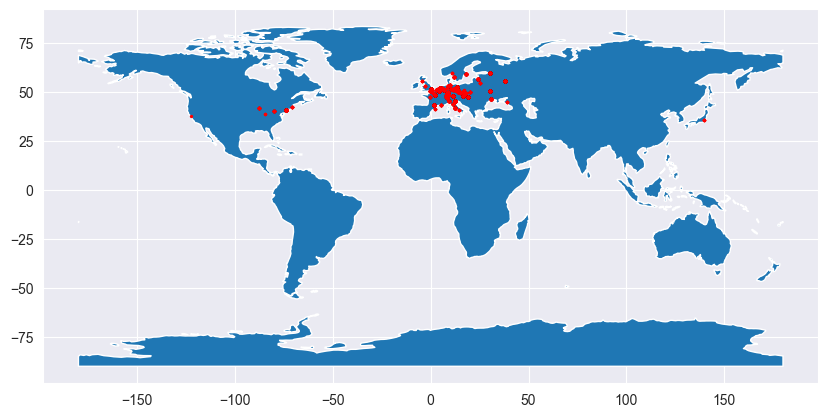

In [72]:
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame
import geodatasets

geo_exhibitions_df = exhibitions_df.select('e.longitude','e.latitude').drop_nulls()

geometry = [Point(xy) for xy in zip(geo_exhibitions_df['e.longitude'], geo_exhibitions_df['e.latitude'])]
gdf = GeoDataFrame(geo_exhibitions_df, geometry=geometry)   

world = gpd.read_file(geodatasets.data.naturalearth.land['url'])
gdf.plot(ax=world.plot(figsize=(10, 6)), marker='o', color='red', markersize=2);

In [101]:
artvis_df.group_by('e.country','e.city','e.venue').agg(pl.col('e.paintings').sum()).sort(by=['e.country','e.city'])

e.country,e.city,e.venue,e.paintings
str,str,str,i64
null,"""-""","""Umělecké sdružení Sursum""",56
null,"""Christiania""","""Christiania Kunstforening""",62
"""AT""","""Vienna""","""Wirtschaftsverband bildender K…",192
"""AT""","""Vienna""","""Galerie Arnot""",286
"""AT""","""Vienna""","""Galerie Miethke""",2178
…,…,…,…
"""US""","""New York""","""The Madison Art Gallery""",15
"""US""","""New York""","""Macbeth Galleries""",62
"""US""","""New York""","""American-Scandinavian Foundati…",148
